In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("E:\Waddah\Alex\VS\Metho\DS Methodology Final Project\Dataset\Cleaned_data.csv")

In [2]:
df.head(2)

,Processor,Display,Video graphics,Hard drive,Storage,RAM,Display Resolution,Screen size,Screen Height,Screen Width,Display Refresh Rate,CPU,GPU,Weight,Price
0,Intel Core Ultra 9 285HX,"18"" 16:10 UHD+ (3840x2400), MiniLED, 120Hz, 10...",Nvidia GeForce RTX 5090 24GB,"6TB, 2TB NVMe PCIe Gen5x4 SSD w/o DRAM + 2TB N...",6000,96,3840x2400,18.0,2400,3840,120,8290,5090,3.6,320000.0
1,Intel Core i9-14900HX,"15.6"" QHD (2560*1440), 165Hz DCI-P3 100% typical",Nvidia GeForce RTX 5070 8GB,1TB NVMe PCIe SSD Gen4x4,1000,16,2560*1440,15.6,1440,2560,165,14900,5070,2.4,79999.0


In [4]:
df.dtypes

Processor                object
Display                  object
Video graphics           object
Hard drive               object
Storage                   int64
RAM                       int64
Display Resolution       object
Screen size             float64
Screen Height             int64
Screen Width              int64
Display Refresh Rate      int64
CPU                       int64
GPU                       int64
Weight                  float64
Price                   float64
dtype: object

### Seperating numerical & object columns  

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [6]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
df[numeric_cols].describe()

,Storage,RAM,Screen size,Screen Height,Screen Width,Display Refresh Rate,CPU,GPU,Weight,Price
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,702.350148,13.844708,16.873986,1199.920870,2056.931751,144.394659,8006.919881,3058.426311,6.427607,49510.895153
std,394.549178,9.782011,5.861077,283.524622,415.911422,45.770970,4886.507696,1106.460440,62.339334,36081.043654
min,128.000000,1.000000,2.800000,768.000000,200.000000,60.000000,1005.000000,3.000000,0.890000,6499.000000
25%,512.000000,8.000000,15.600000,1080.000000,1920.000000,144.000000,1355.000000,3050.000000,1.700000,28111.000000
50%,512.000000,16.000000,15.600000,1080.000000,1920.000000,144.000000,8290.000000,3060.000000,2.000000,39499.000000
75%,1000.000000,16.000000,16.000000,1200.000000,1920.000000,144.000000,12700.000000,3080.000000,2.335000,57777.000000
max,6000.000000,96.000000,40.900000,2560.000000,3840.000000,360.000000,14900.000000,6700.000000,895.000000,320000.000000


In [8]:
df[numeric_cols].head()

,Storage,RAM,Screen size,Screen Height,Screen Width,Display Refresh Rate,CPU,GPU,Weight,Price
0,6000,96,18.0,2400,3840,120,8290,5090,3.60,320000.0
1,1000,16,15.6,1440,2560,165,14900,5070,2.40,79999.0
2,512,8,15.6,1080,1920,144,13420,4050,2.29,39999.0
3,512,16,16.0,1600,2560,120,8290,5050,2.49,57999.0
4,1000,16,16.0,1600,2560,120,8290,5060,2.49,89999.0


#### Outliers Detection

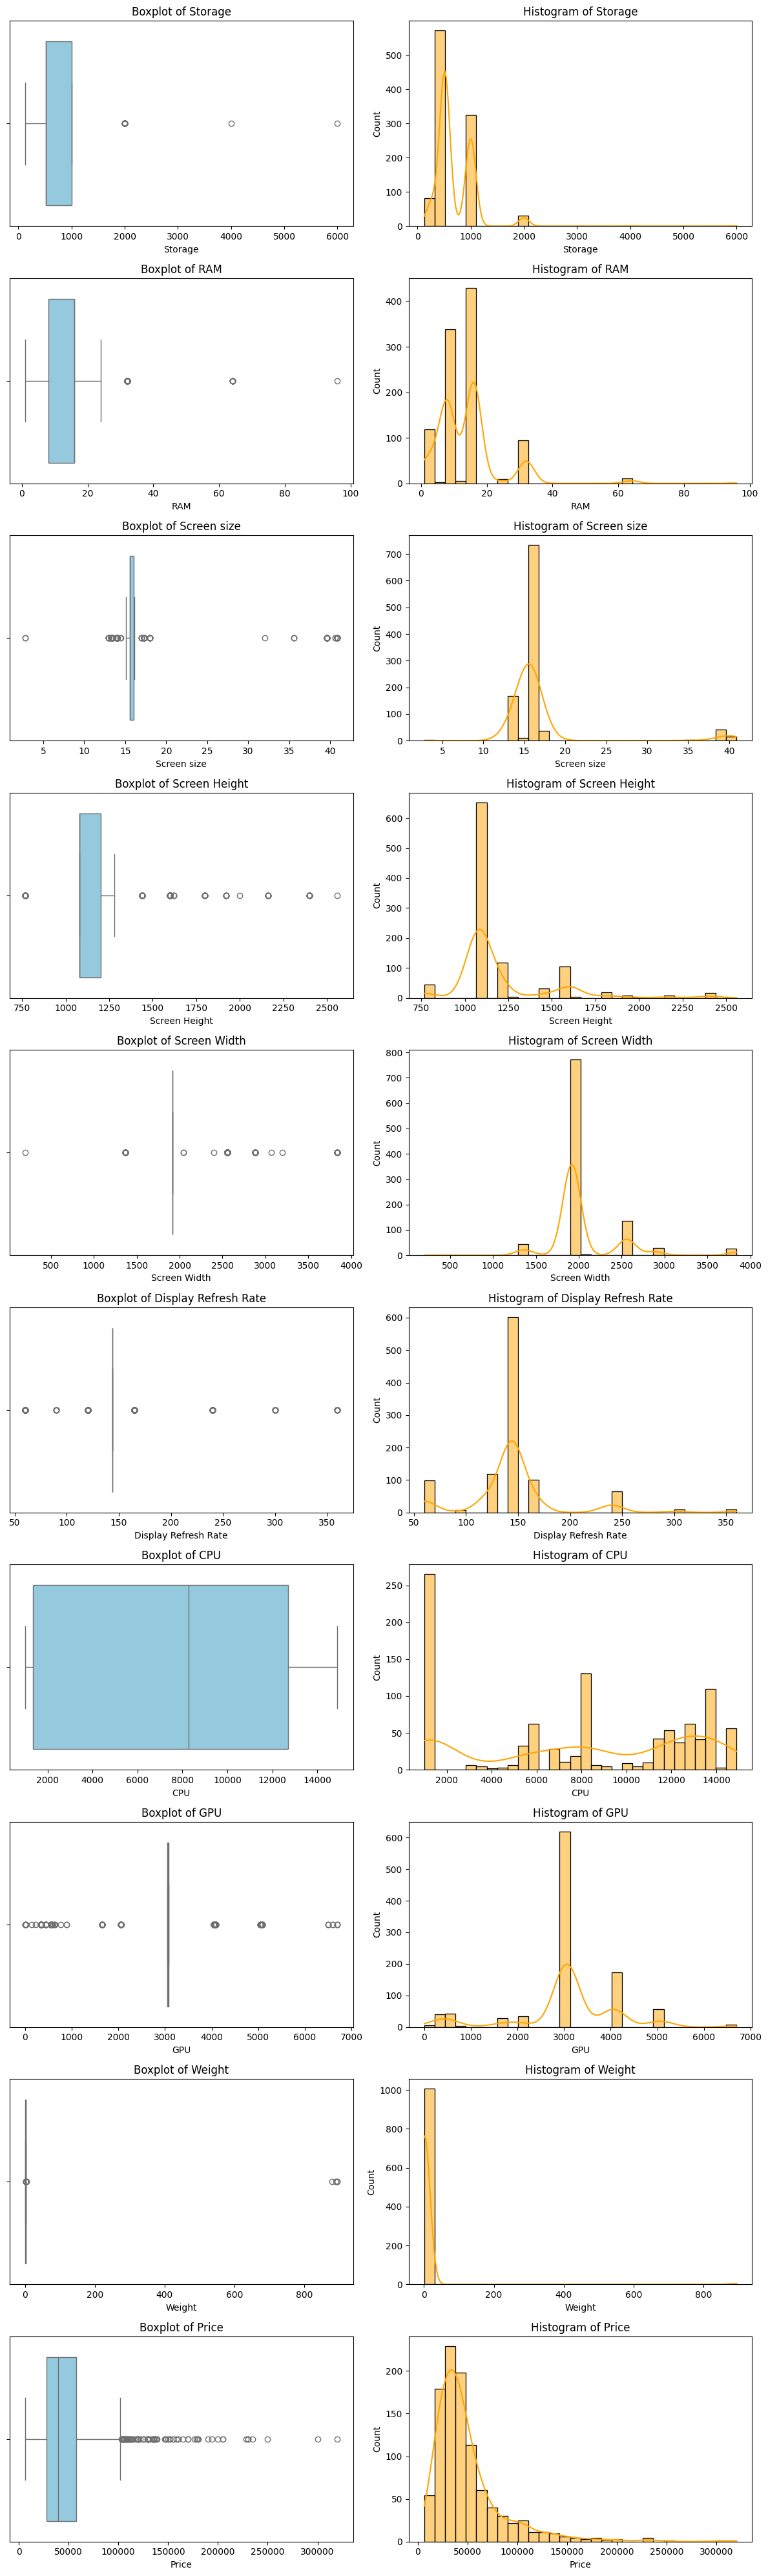

In [9]:
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Boxplot of {col}')
    sns.histplot(df[col], bins=30, ax=axes[i, 1], kde=True, color='orange')
    axes[i, 1].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

<Axes: ylabel='Screen Width'>

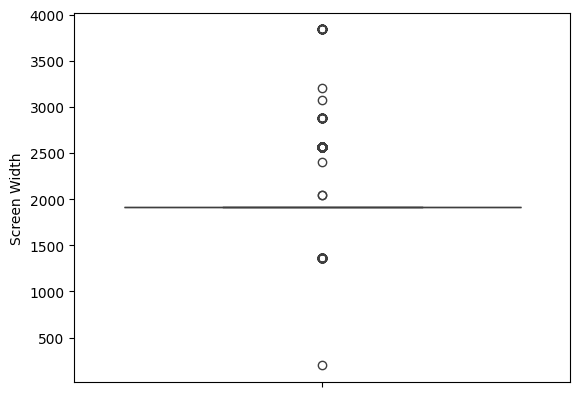

In [10]:
sns.boxplot(df['Screen Width'])

<Axes: ylabel='Screen Height'>

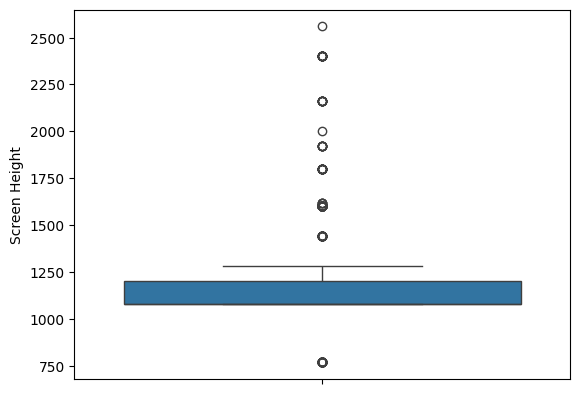

In [11]:
sns.boxplot(df['Screen Height'])

<Axes: ylabel='RAM'>

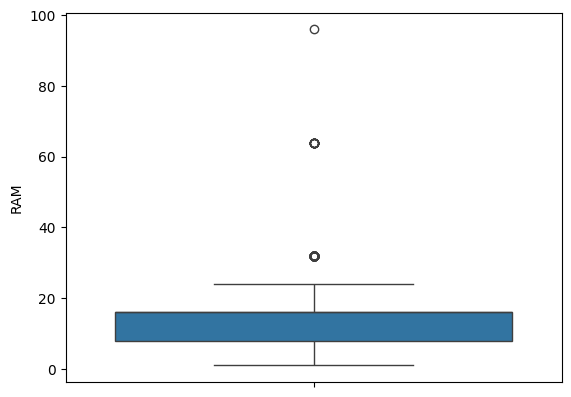

In [12]:
sns.boxplot(df['RAM'])

<Axes: ylabel='Price'>

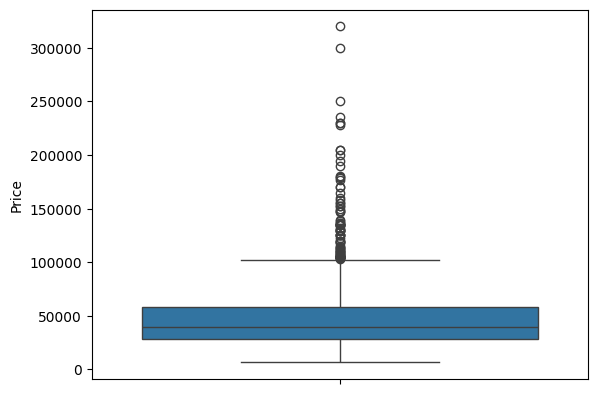

In [13]:
sns.boxplot(df['Price'])

In [14]:
w=df['RAM']
a=df['Price']

In [15]:
w.shape

(1011,)

In [16]:
a.shape

(1011,)

##### A Function to remove the outliers

In [17]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25) 
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

out_rem = remove_outliers_iqr(df, 'RAM')
out_rem = remove_outliers_iqr(df, 'Price')


print(out_rem.shape) 

(927, 15)


In [18]:
out_rem.head(3)


,Processor,Display,Video graphics,Hard drive,Storage,RAM,Display Resolution,Screen size,Screen Height,Screen Width,Display Refresh Rate,CPU,GPU,Weight,Price
1,Intel Core i9-14900HX,"15.6"" QHD (2560*1440), 165Hz DCI-P3 100% typical",Nvidia GeForce RTX 5070 8GB,1TB NVMe PCIe SSD Gen4x4,1000,16,2560*1440,15.6,1440,2560,165,14900,5070,2.40,79999.0
2,Intel Core I5-13420H,15.6'' Inch FHD IPS LED backlight aspect ratio...,Nvidia GeForce RTX 4050 6GB,512 GB SSD,512,8,1920x1080,15.6,1080,1920,144,13420,4050,2.29,39999.0
3,Intel Core 7 240H,"16"" WQXGA 120Hz, 300 nits, ComfortView Plus, 1...",NVIDIA(R) GeForce RTX(TM) 5050,512GB M.2 PCIe NVMe SSD,512,16,2560 x 1600,16.0,1600,2560,120,8290,5050,2.49,57999.0


### Statistics Visualization


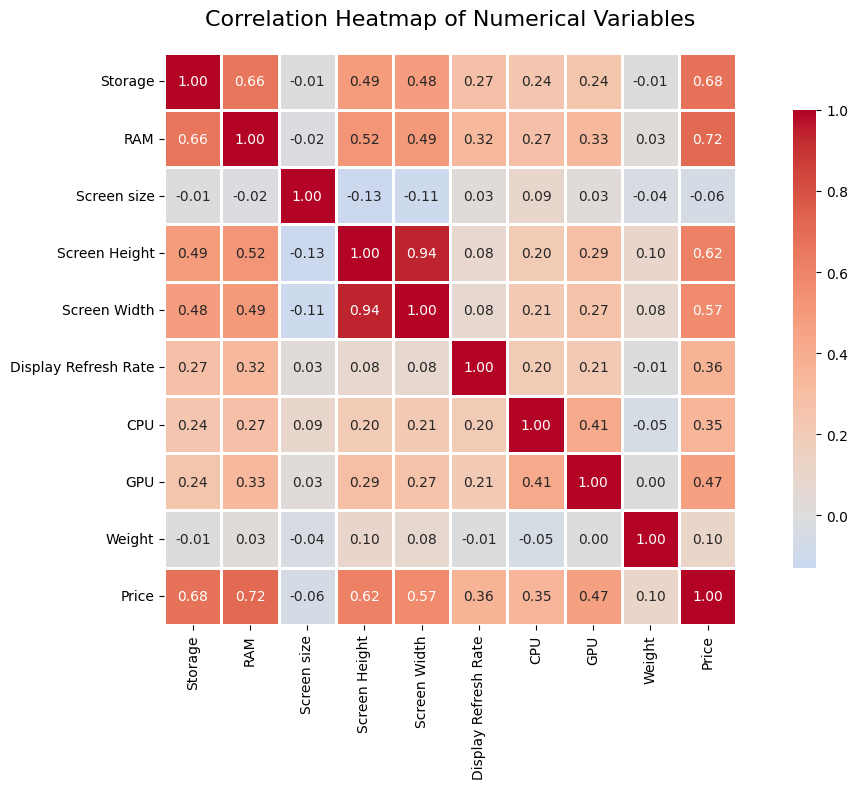

In [19]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


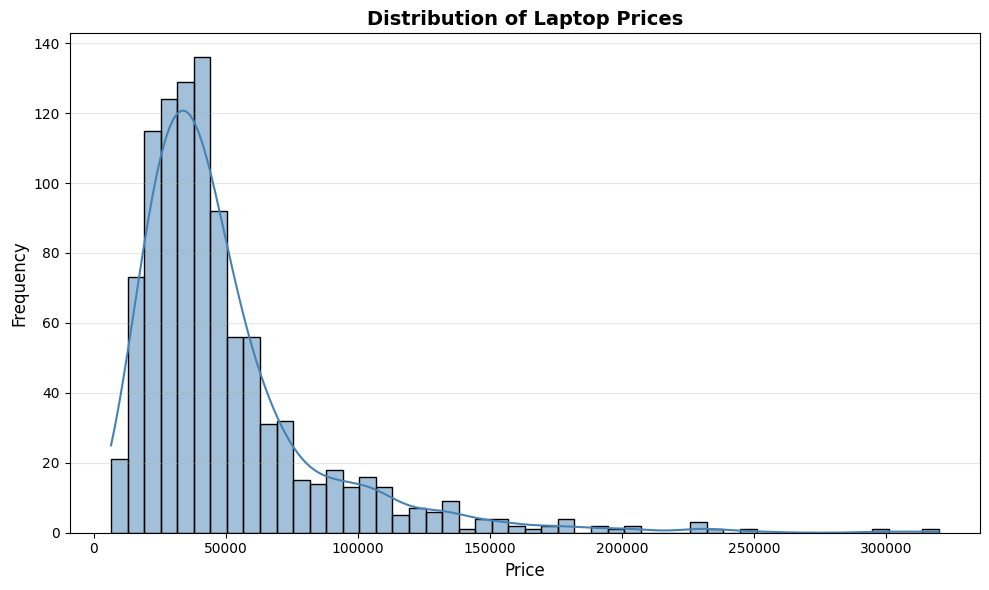

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Laptop Prices', fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


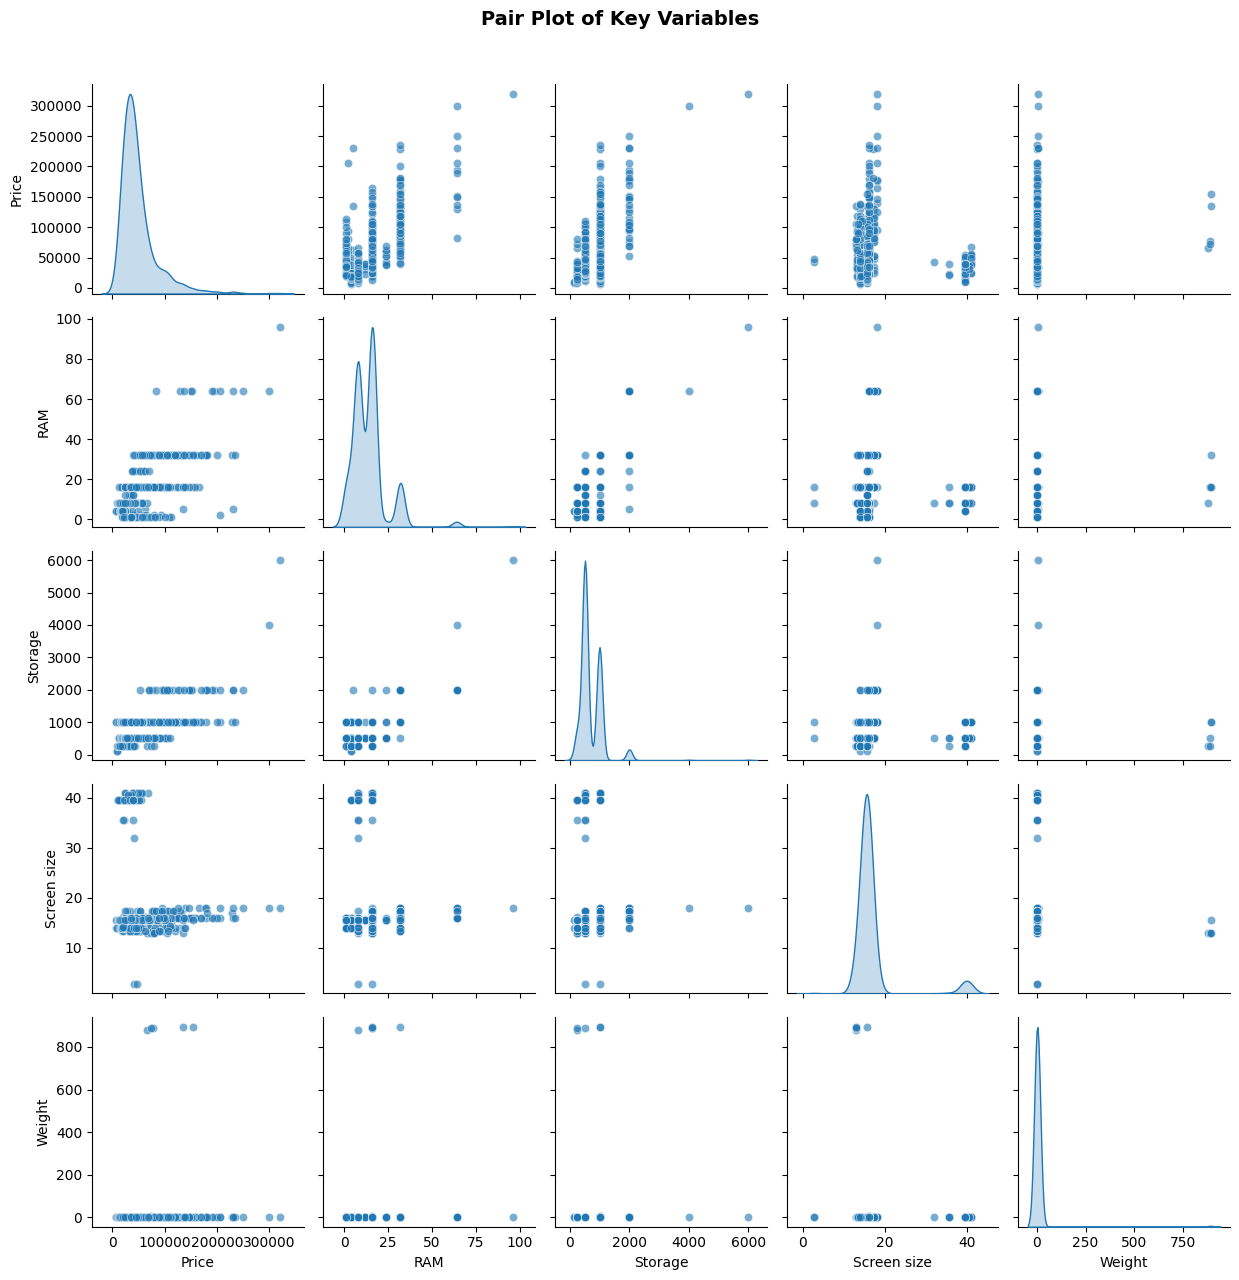

In [21]:
key_vars = ['Price', 'RAM', 'Storage', 'Screen size', 'Weight']
if all(col in df.columns for col in key_vars):
    sns.pairplot(df[key_vars], diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('Pair Plot of Key Variables', y=1.02, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_49120\55485054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RAM', palette='viridis')


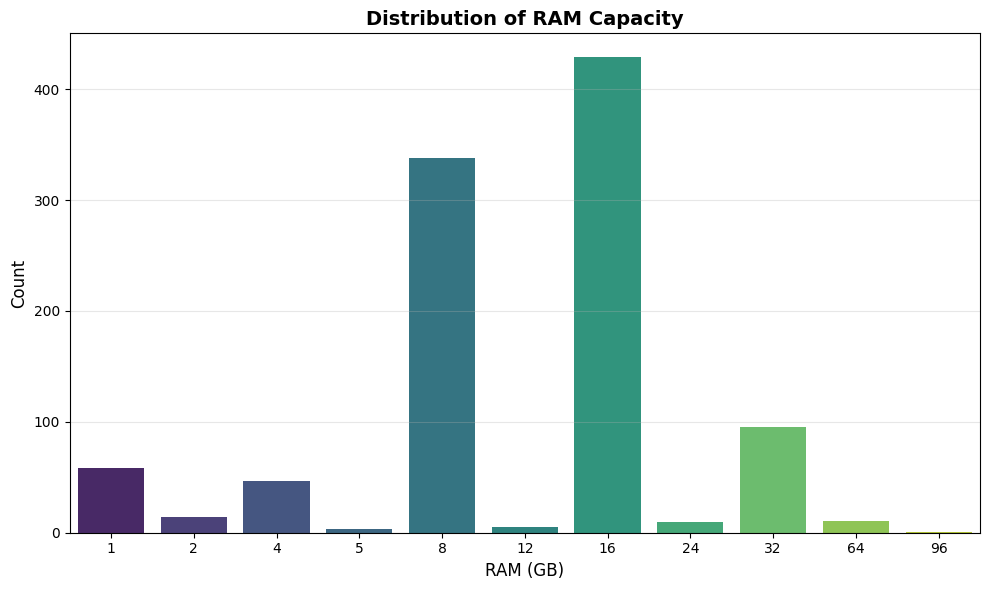

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RAM', palette='viridis')
plt.title('Distribution of RAM Capacity', fontsize=14, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


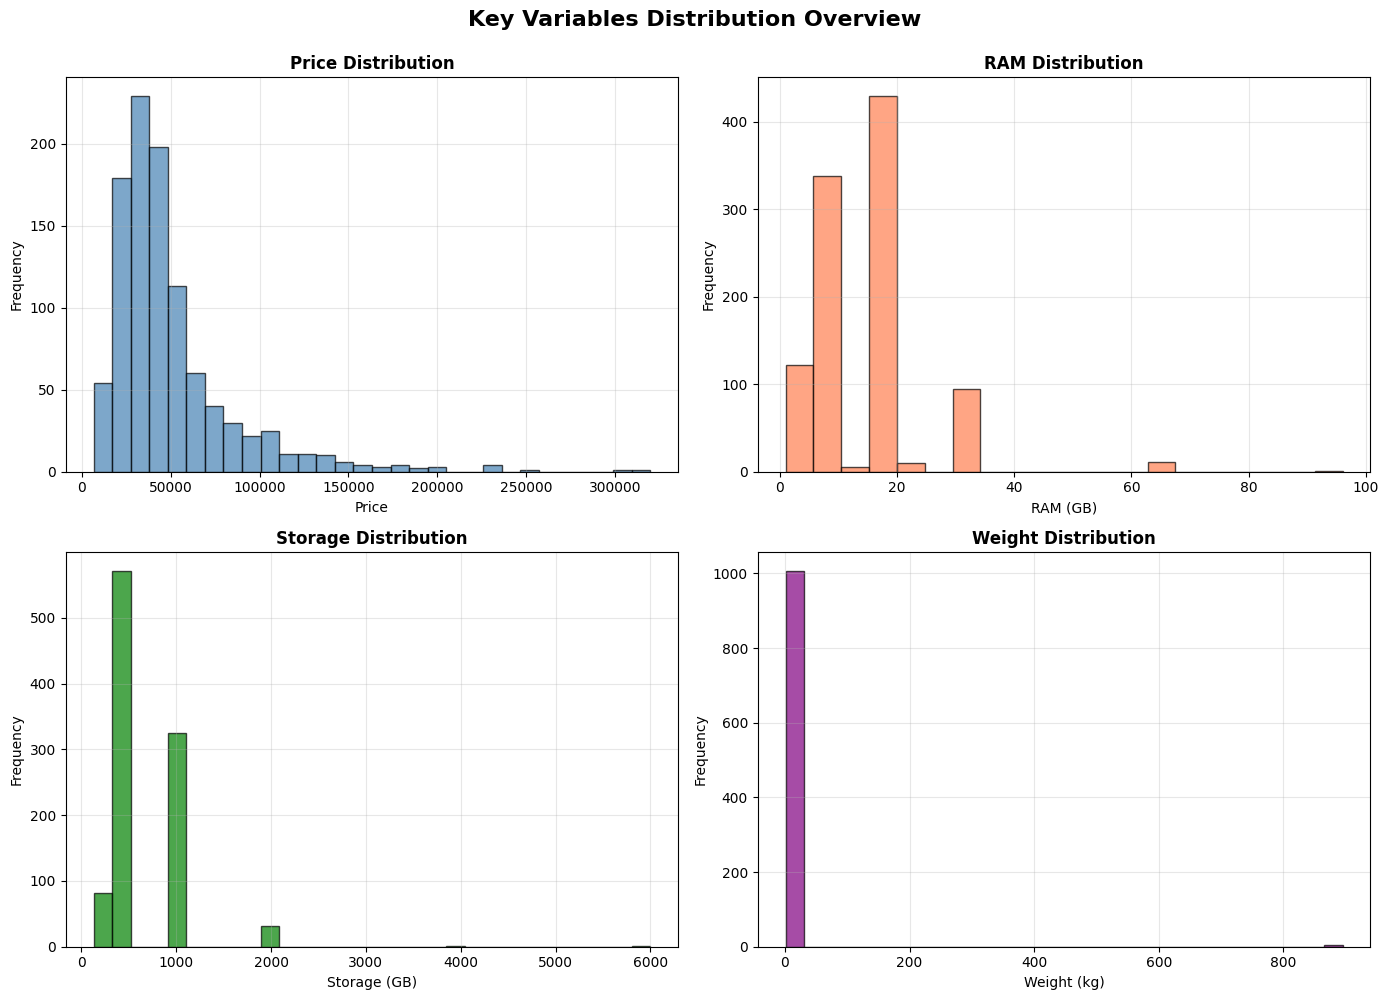

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price distribution
axes[0, 0].hist(df['Price'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Price Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# RAM distribution
axes[0, 1].hist(df['RAM'], bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('RAM Distribution', fontweight='bold')
axes[0, 1].set_xlabel('RAM (GB)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# Storage distribution
axes[1, 0].hist(df['Storage'], bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Storage Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Storage (GB)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

# Weight distribution
axes[1, 1].hist(df['Weight'], bins=30, color='purple', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Weight Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Weight (kg)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Key Variables Distribution Overview', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


In [ ]:
out_rem.to_csv("data_without_outliers.csv", index=False, encoding="utf-8-sig")

In [36]:
df['Processor_Brand'] = df['Processor'].apply(lambda x: 'Intel' if 'Intel' in str(x) else ('AMD' if 'AMD' in str(x) else 'Other'))
df['GPU_Tier'] = df['GPU']

df['GPU_Category'] = pd.cut(df['GPU_Tier'], bins=[0, 3000, 4000, 7000, 13000], 
                            labels=['Low (<=3000)', 'Mid (3001-4000)', 'High (4001-7000)', 'Premium (>=13000)'])

price_by_brand_gpu = df.groupby(['Processor_Brand', 'GPU_Category'])['Price'].mean().unstack(fill_value=0)



C:\Users\HP\AppData\Local\Temp\ipykernel_49120\3343959098.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_brand_gpu = df.groupby(['Processor_Brand', 'GPU_Category'])['Price'].mean().unstack(fill_value=0)


<Figure size 1200x700 with 0 Axes>

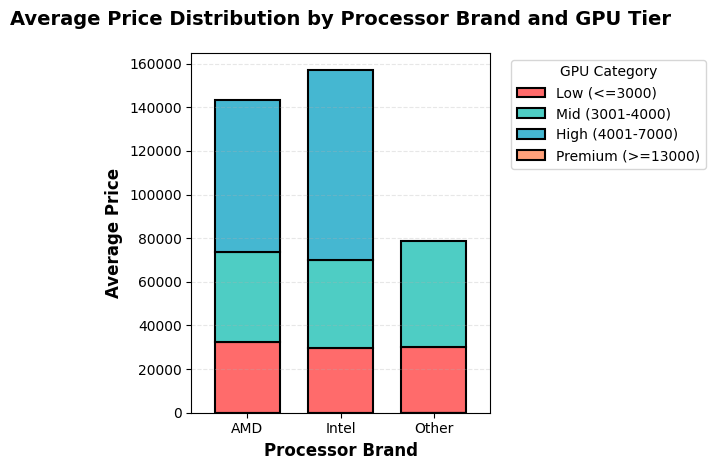

In [37]:
plt.figure(figsize=(12, 7))
price_by_brand_gpu.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], 
                        width=0.7, edgecolor='black', linewidth=1.5)
plt.title('Average Price Distribution by Processor Brand and GPU Tier', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Processor Brand', fontsize=12, fontweight='bold')
plt.ylabel('Average Price', fontsize=12, fontweight='bold')
plt.legend(title='GPU Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()